In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [34]:
data = pd.read_csv("CyberSecurity_BookMyShow_ads_Analysis.csv")

In [35]:
data.head()

,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,0,1,1,1,0,0,0,0,0,...,1,1,0,0,0,0,1,1,0,0
1,2,1,1,1,1,1,0,-1,1,0,...,1,1,0,0,-1,0,1,1,1,0
2,3,1,-1,1,1,1,0,0,0,0,...,1,1,1,0,1,0,1,-1,0,0
3,4,1,-1,1,1,1,0,0,0,1,...,1,1,0,0,1,0,1,0,1,0
4,5,1,-1,0,1,1,0,1,1,0,...,0,1,0,0,-1,0,1,1,1,1


In [36]:
data.shape

(11055, 32)

In [37]:
data.nunique()

index                          8143
having_IPhaving_IP_Address        2
URLURL_Length                     3
Shortining_Service                2
having_At_Symbol                  2
double_slash_redirecting          2
Prefix_Suffix                     2
having_Sub_Domain                 3
SSLfinal_State                    3
Domain_registeration_length       2
Favicon                           2
port                              2
HTTPS_token                       2
Request_URL                       2
URL_of_Anchor                     3
Links_in_tags                     3
SFH                               3
Submitting_to_email               2
Abnormal_URL                      2
Redirect                          2
on_mouseover                      2
RightClick                        2
popUpWidnow                       2
Iframe                            2
age_of_domain                     2
DNSRecord                         2
web_traffic                       3
Page_Rank                   

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   index                        11055 non-null  object
 1   having_IPhaving_IP_Address   11055 non-null  int64 
 2   URLURL_Length                11055 non-null  int64 
 3   Shortining_Service           11055 non-null  int64 
 4   having_At_Symbol             11055 non-null  int64 
 5   double_slash_redirecting     11055 non-null  int64 
 6   Prefix_Suffix                11055 non-null  int64 
 7   having_Sub_Domain            11055 non-null  int64 
 8   SSLfinal_State               11055 non-null  int64 
 9   Domain_registeration_length  11055 non-null  int64 
 10  Favicon                      11055 non-null  int64 
 11  port                         11055 non-null  int64 
 12  HTTPS_token                  11055 non-null  int64 
 13  Request_URL                  11

In [39]:
data.dtypes

index                          object
having_IPhaving_IP_Address      int64
URLURL_Length                   int64
Shortining_Service              int64
having_At_Symbol                int64
double_slash_redirecting        int64
Prefix_Suffix                   int64
having_Sub_Domain               int64
SSLfinal_State                  int64
Domain_registeration_length     int64
Favicon                         int64
port                            int64
HTTPS_token                     int64
Request_URL                     int64
URL_of_Anchor                   int64
Links_in_tags                   int64
SFH                             int64
Submitting_to_email             int64
Abnormal_URL                    int64
Redirect                        int64
on_mouseover                    int64
RightClick                      int64
popUpWidnow                     int64
Iframe                          int64
age_of_domain                   int64
DNSRecord                       int64
web_traffic 

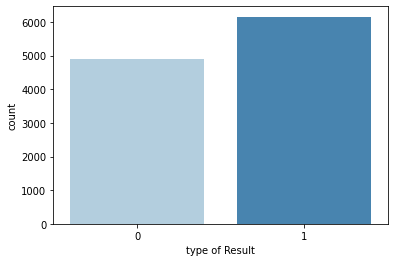

In [40]:
sns.countplot(x='Result', data=data, palette='Blues')
plt.xlabel('type of Result')
plt.show()

In [41]:
data = data.drop('index', axis=1)


In [42]:
data.isnull().sum()

having_IPhaving_IP_Address     0
URLURL_Length                  0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

In [43]:
data.nunique()

having_IPhaving_IP_Address     2
URLURL_Length                  3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [44]:
data['Result'].value_counts()

1    6157
0    4898
Name: Result, dtype: int64

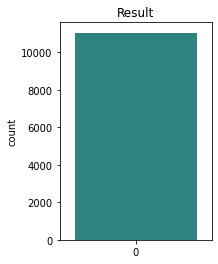

In [45]:
plt.subplot(1,2,2)
sns.countplot(data['Result'], palette='viridis')
plt.title("Result")
plt.show()

In [46]:
all_features = ['having_IPhaving_IP_Address',
'URLURL_Length','Shortining_Service','having_At_Symbol','double_slash_redirecting',
'Prefix_Suffix','having_Sub_Domain','SSLfinal_State','Domain_registeration_length',
'Favicon','port','HTTPS_token','Request_URL','URL_of_Anchor','Links_in_tags','SFH','Submitting_to_email',
'Abnormal_URL','Redirect','on_mouseover','RightClick','popUpWidnow','Iframe','age_of_domain',
'DNSRecord','web_traffic','Page_Rank','Google_Index','Links_pointing_to_page','Statistical_report']


X = data[all_features]
y = data['Result']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size=0.2, random_state=0)

In [48]:
#prediction of train data

# Instantiate logistic regression model
lr = LogisticRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# Predict on train data
y_pred = lr.predict(X_train)

# Calculate evaluation metrics
accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9147444595205789
Precision: 0.9207683073229291
Recall: 0.9278225806451613
F1 Score: 0.9242819843342037


In [49]:
#prediction of test data


# Instantiate logistic regression model
LR = LogisticRegression()

# Fit the model to the training data
LR.fit(X_test, y_test)

# Predict on test data
Y_pred = LR.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, Y_pred)
precision = precision_score(y_test, Y_pred)
recall = recall_score(y_test, Y_pred)
f1 = f1_score(y_test, Y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)


Accuracy: 0.9068294889190411
Precision: 0.9091659785301404
Recall: 0.9197994987468672
F1 Score: 0.9144518272425249


In [50]:
# Preprocess data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate logistic regression model
Logreg = LogisticRegression()

# Fit the model to the training data
Logreg.fit(X_train_scaled, y_train)

# Predict on test data
y_Pred = Logreg.predict(X_test_scaled)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_Pred)
precision = precision_score(y_test, y_Pred)
recall = recall_score(y_test, y_Pred)
f1 = f1_score(y_test, y_Pred)

print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)


Logistic Regression Accuracy: 0.9009497964721845
Logistic Regression Precision: 0.8975609756097561
Logistic Regression Recall: 0.9223057644110275
Logistic Regression F1 Score: 0.9097651421508035


# Hyper Parameter tuning

In [51]:
from sklearn.model_selection import GridSearchCV

In [52]:
hyperparameters = {'C': [0.01, 0.1,0.2,1, 10],
                   'penalty': ['l1', 'l2']}

In [53]:
grid_search = GridSearchCV(LR, hyperparameters, cv=5)

In [54]:
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 0.2, 1, 10], 'penalty': ['l1', 'l2']})

In [55]:
best_params = grid_search.best_params_

In [56]:
best_logistic_reg = LogisticRegression(**best_params)
best_logistic_reg.fit(X_train_scaled, y_train)

LogisticRegression(C=1)

In [57]:

accuracy = accuracy_score(y_train, y_pred)
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)

Accuracy: 0.9147444595205789
Precision: 0.9207683073229291
Recall: 0.9278225806451613
F1 Score: 0.9242819843342037


In [58]:
y_train_pred=best_logistic_reg.predict(X_test_scaled)
y_Pred = best_logistic_reg.predict(X_test_scaled)

In [59]:
print('Logistic Regression Accuracy:', accuracy)
print('Logistic Regression Precision:', precision)
print('Logistic Regression Recall:', recall)
print('Logistic Regression F1 Score:', f1)

Logistic Regression Accuracy: 0.9147444595205789
Logistic Regression Precision: 0.9207683073229291
Logistic Regression Recall: 0.9278225806451613
Logistic Regression F1 Score: 0.9242819843342037
